A seguir será realizado uma técnica cujo o termo se dá como "Amostragem". Esse termo resulta na medição de uma população. Executaremos passo a passo com nosso dataset

=======================================| Importando bibliotecas | ===============================

In [3]:
import numpy as np
import pandas as pd

Permissionamento do Driver

In [4]:
from google.colab import drive    
drive.mount('/content/drive')

Mounted at /content/drive


Leitura do arquivo pelo driver, vale ressaltar que é necessário obter o arquiv em seu driver


In [5]:
df = pd.read_csv('/content/drive/MyDrive/UP/Ciência de Dados/DATASET/2022Viagem.csv', engine='python' , encoding = 'ISO-8859-1', sep=';')

Podems analisar o arquivo nessa momento.

In [ ]:
df.info()


In [7]:
df['Per?odo - Data de fim'] = pd.to_datetime(df['Per?odo - Data de fim'])
df['Per?odo - Data de in?cio'] = pd.to_datetime(df['Per?odo - Data de in?cio'])

Podemos verificar que as colunas de referente a datas se converteram a date_time


In [ ]:
df.info()

In [ ]:
df

Feito iss iremos dar início a nossa amostragem.

Iremos pegar os dados referente ao mês de agosto

In [11]:
df_amostra = df.loc[(df['Per?odo - Data de in?cio'].dt.month == 8) & (df['Per?odo - Data de fim'].dt.month == 8)]

In [ ]:
df_amostra

### ======================================| Aleatória Simples |==========================:

A amostragem aleatória simples será definida por um sorteio, iremos apenas analisar apenas 1000 dados

In [13]:
df_registros = df_amostra.sample(1000)

In [14]:
new_size = df_registros.shape

df_registros.shape

(1000, 22)

## Vamos salvar esses dados em um arquivo csv

In [15]:
import csv


Para afins de teste vamos ler esse arquivo para garantir sua integridade dos dados.

In [ ]:
# 1. cria o arquivo
arquivo = open('/content/drive/MyDrive/UP/Ciência de Dados/DATASET/arquivo_registros.csv', 'w', newline='', encoding='utf-8')

gravar = csv.writer(arquivo)

# 3. grava as linhas
for i in df_registros:
    print(i)

# Recomendado: feche o arquivo
arquivo.close() 

Iremos agora partir para a Amostragem Sistemática

## =====================| Sistemática |====================

In [21]:
from datetime import date

Iremos definir a pesquisa de acordo com o dia da semana, se ele for par iremos ordenar de uma maneira, caso ao contrário será ordenado de outra maneira.

In [32]:
data_agora = date.today()
dia_semana = data_agora.day

# Validação se for par ou nao

if dia_semana % 2 == 0 :
  inicio = np.random.choice(30, 1)
  valor_pular = 50
else:
  inicio = np.random.choice(5, 1)
  valor_pular = 20

amostra_sistematica = np.arange(inicio,new_size[0],valor_pular)

df_sist = df_registros.iloc[amostra_sistematica,:]

df_sist

,Identificador do processo de viagem,N?mero da Proposta (PCDP),Situa??o,Viagem Urgente,Justificativa Urg?ncia Viagem,C?digo do ?rg?o superior,Nome do ?rg?o superior,C?digo ?rg?o solicitante,Nome ?rg?o solicitante,CPF viajante,...,Fun??o,Descri??o Fun??o,Per?odo - Data de in?cio,Per?odo - Data de fim,Destinos,Motivo,Valor di?rias,Valor passagens,Valor devolu??o,Valor outros gastos
333989,18272092,Informa??es pro,Realizada,N?O,Informa??o protegida por sigilo nos termos da ...,30000,Minist?rio da Justi?a e Seguran?a P?blica,30802,Departamento de Pol?cia Rodovi?ria Federal,ID147800100,...,Sigilosa,Informa??es protegidas por sigilo,2022-08-15,2022-08-18,Informa??es protegidas por sigilo,Informa??o protegida por sigilo nos termos da ...,"1170,47",0,0,0
318503,18242366,017533/22,Realizada,N?O,Sem informa??o,22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",***.615.131-**,...,-1,N?o Informado,2022-08-22,2022-08-24,Rio Verde/GO,Acompanhar coleta de amostras em granja GRSC d...,"689,79",0,0,0
324632,18253191,000854/22,Realizada,SIM,Levantamento de servi?os na Fazenda Yakult.,26000,Minist?rio da Educa??o,26246,Universidade Federal de Santa Catarina,***.378.139-**,...,-1,N?o Informado,2022-08-08,2022-08-08,Balne?rio Barra do Sul/SC,Levantamento de servi?os na Fazenda Yakult.,"111,98",0,0,0
338824,18283997,018947/22,Realizada,SIM,Autoriza??o anexa.,22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",***.574.252-**,...,-1,N?o Informado,2022-08-23,2022-08-26,"Caracara?/RR, Alto Alegre/RR, Norm?ndia/RR",Auxiliar nas atividades de fiscaliza??o de in...,"894,65",0,0,0
311658,18230711,Informa??es pro,Realizada,N?O,Informa??o protegida por sigilo nos termos da ...,30000,Minist?rio da Justi?a e Seguran?a P?blica,30802,Departamento de Pol?cia Rodovi?ria Federal,ID011800340,...,Sigilosa,Informa??es protegidas por sigilo,2022-08-14,2022-08-19,Informa??es protegidas por sigilo,Informa??o protegida por sigilo nos termos da ...,"1550,85",0,0,0
300794,18212251,Informa??es pro,Realizada,N?O,Informa??o protegida por sigilo nos termos da ...,30000,Minist?rio da Justi?a e Seguran?a P?blica,30802,Departamento de Pol?cia Rodovi?ria Federal,ID003300113,...,Sigilosa,Informa??es protegidas por sigilo,2022-08-15,2022-08-17,Informa??es protegidas por sigilo,Informa??o protegida por sigilo nos termos da ...,"885,09","5573,4",0,0
338349,18282680,018942/22,Realizada,SIM,"Nota t?cnica, em anexo.",22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",***.256.481-**,...,-1,N?o Informado,2022-08-19,2022-08-19,Professor Jamil/GO,ACOMPANHAR DESCARTE DE PRODUTOS APREENDIDOS SI...,"129,63",0,0,0
329209,18262359,002118/22,Realizada,SIM,a) A viagem foi solicitada intempestivamente p...,53000,Minist?rio do Desenvolvimento Regional,22204,Departamento Nacional de Obras Contra as Secas,***.477.153-**,...,-1,N?o Informado,2022-08-16,2022-08-19,Chaval/CE,Realizar servi?os?de?perfura??o de?po?os?p?bli...,"969,87",0,0,0
321236,18247421,017645/22,Realizada,N?O,Sem informa??o,22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",22000,"Minist?rio da Agricultura, Pecu?ria e Abasteci...",***.017.391-**,...,-1,N?o Informado,2022-08-08,2022-08-08,Osasco/SP,Apura??o de den?ncia junto ao estabelecimento ...,0,0,0,0
333518,18271117,004485/22,Realizada,SIM,A convocat?ria para participa??o da realiza??o...,30000,Minist?rio da Justi?a e Seguran?a P?blica,30202,Funda??o Nacional do ?ndio,***.284.858-**,...,DAS-1012,Cargo de Assessoramento,2022-08-16,2022-08-16,S?o Paulo/SP,Participar da 2? reuni?o ordin?ria do Conselho...,"169,75",0,0,0


Nesse momento iremos utilizar a Amostragem Estratificada para poder dividir os dados em grupos.

## ====================| Estratificada |===================

Nesse grupo iremos separar pelas viagens urgentes e ver quantas ocorrências de viagens urgentes ocorreram

In [34]:
df_sist['Viagem Urgente'].value_counts()

N?O    31
SIM    19
Name: Viagem Urgente, dtype: int64

Podemos analisar que a quantidade de estratificada de viagens urgentes esta com predominancia em "Sim".Ou seja , com o grupo apresentado, houve mais viagens urgentes do que não urgentes

In [ ]:
viagens = df_sist.loc[(df_sist['Viagem Urgente'] == "SIM")]
cidades = viagens['Destinos'].value_counts()

cidades

Agora vamos analisar em graficos

In [25]:
import matplotlib.pyplot as plt

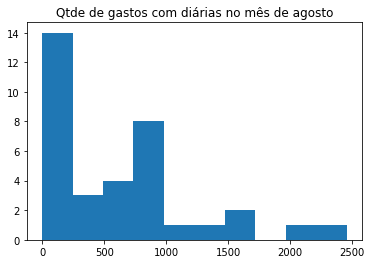

In [26]:
valores = viagens[['Valor di?rias', 'Destinos']]

valores
valores_att = []

for index,  val in enumerate(valores['Valor di?rias']):
  valores_att.append( val.replace(',',  '.'))

valor_diarias = np.array(valores_att, dtype=float)

plt.title('Qtde de gastos com diárias no mês de agosto')
plt.hist(valor_diarias)
plt.show()

Podemos observar que no mês de agosto tivemos apenas 3 ocorrências que ultrapassaram o valor de 1500. Em comparação , houve 8 viagens que não teve gasto com estadia

Vamos comparar agor o valor das passagens

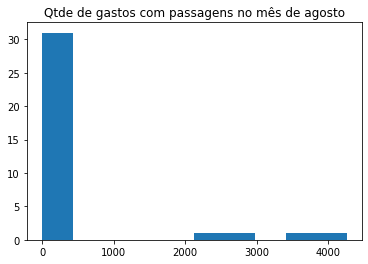

In [27]:


valores_passagens = viagens[['Valor passagens', 'Destinos']]

valores
valores_passagens_att = []

for index,  val in enumerate(valores_passagens['Valor passagens']):
  valores_passagens_att.append( val.replace(',',  '.'))

valor_pass = np.array(valores_passagens_att, dtype=float)

plt.title('Qtde de gastos com passagens no mês de agosto')
plt.hist(valor_pass)
plt.show()

In [28]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

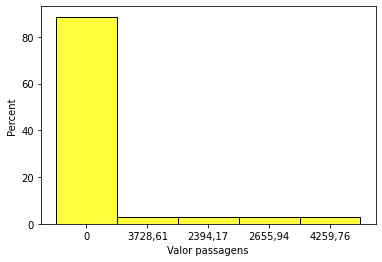

In [50]:
sns.histplot(viagens, x='Valor passagens', bins=15, color="yellow", kde=False, stat="percent");

In [39]:
df_sist['Valor passagens'].value_counts()

0          38
5573,4      1
1945,65     1
1302,6      1
1420,13     1
3166,39     1
826,63      1
1243,56     1
2213,44     1
1817,59     1
4353,69     1
2442,29     1
4185,5      1
Name: Valor passagens, dtype: int64

In [52]:
import plotly.express as px


Iremos trabalhar nesse momento com histogramas, pois o recurso de visualização dos dados se torna mais notável

In [56]:
grafico =  px.histogram (df_sist,  x = "Valor passagens", nbins=15, color='Viagem Urgente') 
grafico.update_layout(width=500,height=500,title_text='Análise do custo das passagens urgentes',
                      title_font_color = 'black') 
grafico.show()

## Medidas de dispersão

In [62]:
import matplotlib.pyplot as plt

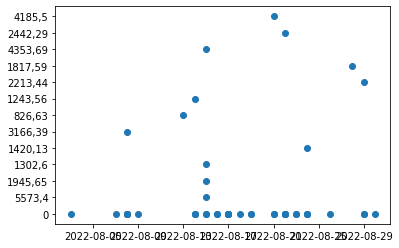

In [73]:
verifica_valores  = df_sist.loc(['Valor passagens'] != 0 )

plt.scatter(verifica_valores['Per?odo - Data de in?cio'], verifica_valores['Valor passagens'],)

Difícil de visualizar , não é mesmo?

Iremos utilizar outro recurso para melhorar a análise

In [74]:
import plotly.express as px

In [75]:

fig = px.scatter(df_sist, x='Per?odo - Data de in?cio', y='Valor passagens')
fig.show()

Com esse recurso podemos observar o aumento do valor conforme o mês vai caminhando. Quanto mais próximo da metade, o valor da passagem aumenta

In [99]:
df_setember = df.loc[(df['Per?odo - Data de in?cio'].dt.month == 9) & (df['Per?odo - Data de fim'].dt.month == 9)]

df_oct = df.loc[(df['Per?odo - Data de in?cio'].dt.month == 10) & (df['Per?odo - Data de fim'].dt.month == 10)]

In [116]:
# Setembro e outubro

df_set = df_setember.sample(500)
df_oct = df_oct.sample(500)


new_size_set = df_set.shape
new_size_oct = df_oct.shape

In [ ]:
amostra_set = np.arange(inicio,new_size_set[0],valor_pular)
amostra_oct = np.arange(inicio,new_size_oct[0],valor_pular)

df_sist_set = df_set.iloc[amostra_set,:]
df_sist_oct = df_oct.iloc[amostra_oct,:]


Analiseramos agora o mês de setembro para confirmar

In [ ]:
df_sist_set

In [120]:

fig = px.scatter(df_sist_set, x='Per?odo - Data de in?cio', y='Valor passagens')
fig.show()

Analisaremos o mês de Outuvro

In [ ]:
df_sist_oct

In [121]:

fig_oc = px.scatter(df_sist_oct, x='Per?odo - Data de in?cio', y='Valor passagens')
fig_oc.show()

Valos analisar as diárias

In [123]:

# AGOSTO

fig = px.scatter(df_sist, x='Per?odo - Data de in?cio', y='Valor di?rias')
fig.show()

In [125]:

# SETEMBRO

fig = px.scatter(df_sist_set, x='Per?odo - Data de in?cio', y='Valor di?rias')
fig.show()

In [126]:
# OUTUBRO
fig_oc = px.scatter(df_sist_oct, x='Per?odo - Data de in?cio', y='Valor di?rias')
fig_oc.show()

## |====================================================================|

In [130]:
# AGOSTO

fig = px.scatter(df_sist, x='Per?odo - Data de in?cio', y='Valor di?rias', color="Viagem Urgente",
                 hover_data=['Destinos'])
fig.show()

Percebe-se que no mês de agosto , entre o dia 14  até 21 , houve um grande volume de viagens urgentes

In [131]:
# SETEMBRO

fig = px.scatter(df_sist_set, x='Per?odo - Data de in?cio', y='Valor di?rias', color="Viagem Urgente",
                 hover_data=['Destinos'])
fig.show()

Ao contrário, setembro apresentou no início do seu mês uma demanada de viagens importantes

In [132]:
# OUTUBRO

fig = px.scatter(df_sist_oct, x='Per?odo - Data de in?cio', y='Valor di?rias', color="Viagem Urgente",
                 hover_data=['Destinos'])
fig.show()